In [20]:
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import math


In [21]:
class bagging():
    """Bagging de classifieur binaire label 1 : -1 """

    def __init__(self,nbr_classifier=5):
        """Constructeur
        nbr_classifier: Nombre de classifieur a considere"""

        self.nbr_classifier = nbr_classifier   
   
    def fit(self, X,Y):
        """Training"""

        # n  correspond au nombre de sample
        n = X.shape[0] 

        #Bootstrap pour mes classifieurs
        n_class = n/self.nbr_classifier 

        #initialisation des classifieurs
        self.clf = [tree.DecisionTreeClassifier() for i in range(self.nbr_classifier)] 

        #training de chaque classifieur sur le bootstrap
        for i in range(self.nbr_classifier): 

            #Bootstrap pour mes classifieurs
            ids = np.random.choice(n,n_class) 
            self.clf[i]= self.clf[i].fit(X[ids],Y[ids]) 
        
    def prediction(self, X):
        out = []
        for i in range(X.shape[0]): 
            result = []
            for j in range(self.nbr_classifier): 
                result.append(self.clf[j].predict(X[i].reshape(1, X.shape[1]))) 
            
            #On choisit celui qui a le plus de vote (en cas d'égalité on met positif)
            
            out.append(np.sign(np.sum(result)))
        return np.array(out)

    def accuracy(self, pred , Y):
        acc = pred - Y
        return np.where(acc==0,1,0).sum()/float(len(pred)) 



In [22]:
data = datasets.fetch_mldata('a1a')
X=data.data.todense()
Y=data.target

In [23]:
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
max_classifier=50
acc=np.zeros(max_classifier)
training_error=np.zeros(max_classifier)

for nbr_classifieur in range(0,max_classifier):
    bag = bagging(nbr_classifieur+1)
    train = bag.fit(xtrain,ytrain)

    pred = bag.prediction(xtrain)                      #Estimation de l'erreur sur la base d'apprentissage
    training_error[nbr_classifieur]= 100-bag.accuracy(pred,ytrain)*100
    
    pred = bag.prediction(xtest)                       #Estimation du taux de reconnaissance sur la base de test
    acc[nbr_classifieur]= bag.accuracy(pred,ytest)*100
    print('%2d DecisionTree : Accuracy on test:%.2f%% | Training Error Rate:%.2f%%' % (nbr_classifieur+1,acc[nbr_classifieur],training_error[nbr_classifieur]))

 1 DecisionTree : Accuracy on test:75.51% | Training Error Rate:23.98%
 2 DecisionTree : Accuracy on test:75.51% | Training Error Rate:23.98%
 3 DecisionTree : Accuracy on test:75.51% | Training Error Rate:23.98%
 4 DecisionTree : Accuracy on test:75.51% | Training Error Rate:23.98%
 5 DecisionTree : Accuracy on test:75.51% | Training Error Rate:23.98%
 6 DecisionTree : Accuracy on test:75.51% | Training Error Rate:23.98%


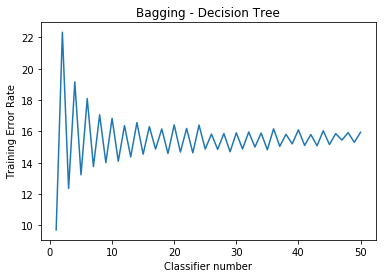

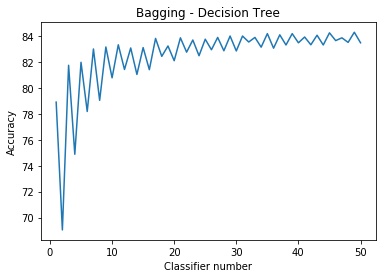

In [163]:
plt.plot(range(1,max_classifier+1),training_error)
plt.xlabel('Classifier number')
plt.ylabel('Training Error Rate')
plt.title('Bagging')
plt.show()
    
plt.plot(range(1,max_classifier+1),acc)
plt.xlabel('Classifier number')
plt.ylabel('Accuracy')
plt.title('Bagging')
plt.show()

In [145]:
class Boosting():
    '''Boosting with classifieur binaire label 1:-1 '''
    
    def __init__(self, B):
        #B : number of classifier
        self.B = B 
        
    def fit(self, x, y):
        
        #Initialisation des poids 
        self.w = np.ones((len(x)))/len(x)
        
        #Initialisation des classifieurs
        self.classifs = [tree.DecisionTreeClassifier() for i in range(self.B)]

        #Initialisation des alphas
        self.alphas = [0 for i in range(self.B)]

        for i in range(self.B):
            self.classifs[i].fit(x , y , sample_weight = self.w) 
            pred = self.classifs[i].predict(x) 

            #On recupere les samples mal prédit
            idx_diff = np.where(pred != y)[0] 
            
            error = 0
            for idx in idx_diff:
                error += self.w[idx]
            
            #On recupere seulement quand lerreur de prédiction est inférieur à 0.5
            if error < 0.5 :
                self.alphas[i] = float(0.5*np.log((1 - error) / error))

                # Z facteur de normalisation
                z = float(2*np.sqrt(error*(1-error)))
                
                #mettre a jour des poids des samples                    
                for k in range(len(self.w)): 
                    self.w[k] *= (np.exp(-self.alphas[i] * y[k] * pred[k]) / (z*1.0))

            else : 
                self.alpha[i]= 0  
        
        
    def predict(self, x):
        pred = []
        for example in x:
            results = np.array([self.classifs[i].predict(example.reshape(1 , x.shape[1])) for i in range(self.B)])

            final = np.sign(np.dot(np.array(self.alphas).T , results))
            pred.append(final)
        return np.array(pred) 
    
    def accuracy(self, pred , Y):
        acc = pred - Y.reshape(len(Y),1)
        return np.where(acc==0,1,0).sum()/float(len(pred))

In [146]:
max_classifier=50
acc=np.zeros(max_classifier)
training_error=np.zeros(max_classifier)

for nbr_classifieur in range(0,max_classifier):
    boosting = Boosting(nbr_classifieur+1)
    boosting.fit(xtrain , ytrain)
    
    pred = boosting.predict(xtrain)                          
    training_error[nbr_classifieur]=100-boosting.accuracy(pred,ytrain)*100
    
    pred = boosting.predict(xtest)                         
    acc[nbr_classifieur]= boosting.accuracy(pred,ytest)*100
    print('%2d DecisionTree : Accuracy on test:%.2f%% | Training Error Rate:%.2f%%' % (nbr_classifieur+1,acc[nbr_classifieur],training_error[nbr_classifieur]))

 1 classifiers =>    Accuracy:80.00%      Training Error Rate:1.75%
 2 classifiers =>    Accuracy:80.00%      Training Error Rate:1.75%
 3 classifiers =>    Accuracy:80.00%      Training Error Rate:0.00%
 4 classifiers =>    Accuracy:86.67%      Training Error Rate:0.00%
 5 classifiers =>    Accuracy:86.67%      Training Error Rate:0.00%
 6 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
 7 classifiers =>    Accuracy:86.67%      Training Error Rate:0.00%
 8 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
 9 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
10 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
11 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
12 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
13 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
14 classifiers =>    Accuracy:93.33%      Training Error Rate:0.00%
15 classifiers =>    Accuracy:93.33%      Traini

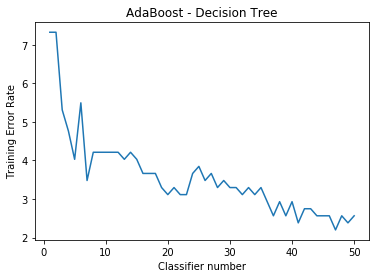

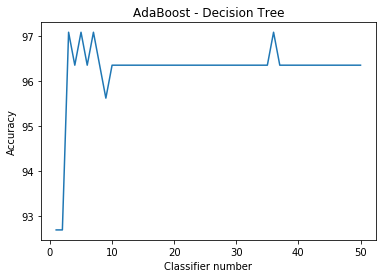

In [136]:
plt.plot(range(1,max_classifier+1),training_error)
plt.xlabel('Classifier number')
plt.ylabel('Training Error Rate')
plt.title('AdaBoost - Decision Tree')
plt.show()

plt.plot(range(1,max_classifier+1),acc)
plt.xlabel('Classifier number')
plt.ylabel('Accuracy')
plt.title('AdaBoost - Decision Tree')
plt.show()